### FINAL PROJECT: MOVIE RECOMMENDATION SYSTEM

### Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Lookup & Cleaning

#### Reading the Dataset and assigning that to the variable df

In [2]:
# Load movies and ratings CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


#### Access the first 5 rows of a dataframe

In [3]:
#merge the files
df=pd.merge(ratings,movies, how='left',on='movieId')


In [4]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


#### Access the last 5 rows of a dataframe

In [5]:
df.tail()

,userId,movieId,rating,timestamp,title,genres
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western
105338,668,148626,4.5,1451148148,The Big Short (2015),Drama


#### Prints information about the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


#### Dimension of the Dataset

In [7]:
df.shape

(105339, 6)

#### Checking the data type for each column

In [8]:
df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

#### Checking for duplicate values

In [9]:
df.duplicated().sum()

0

#### Drop the duplicate values

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum() #Make sure that the duplicate values are droped

0

#### Checking for null values

In [12]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

#### Drop the null values

In [13]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [14]:
df['genres'].unique()

array(['Crime|Drama', 'Drama|Sci-Fi', 'Mystery|Sci-Fi|Thriller',
       'Mystery|Thriller', 'Crime|Mystery|Thriller', 'Action|Drama|War',
       'Adventure|Drama|IMAX', 'Drama|Thriller|War',
       'Action|Crime|Thriller', 'Action', 'Comedy', 'Comedy|Sci-Fi',
       'Action|Adventure|Sci-Fi', 'Drama', 'Comedy|Crime|Drama|Thriller',
       'Action|Crime|Drama|Thriller', 'Comedy|Drama|Romance|War',
       'Action|Romance|Thriller',
       'Action|Adventure|Comedy|Romance|Thriller', 'Thriller',
       'Action|Adventure|Sci-Fi|Thriller', 'Drama|War', 'Action|Sci-Fi',
       'Adventure|Drama|Western', 'Crime|Horror|Thriller',
       'Comedy|Romance', 'Action|Adventure|Mystery|Thriller',
       'Drama|Fantasy|Horror|Thriller',
       'Action|Adventure|Romance|Thriller', 'Drama|Romance',
       'Horror|Sci-Fi|Thriller', 'Adventure|Comedy|Fantasy',
       'Action|Adventure', 'Action|Comedy|Musical', 'Comedy|Drama',
       'Horror', 'Comedy|Fantasy|Romance', 'Crime|Thriller|War',
       'Advent

In [15]:
# Perform one-hot encoding on genres
genres_encoded = df['genres'].str.get_dummies('|')

# Combine encoded genres with the main data
df = pd.concat([df, genres_encoded], axis=1)

# Display updated data
print(df.head())


   userId  movieId  rating   timestamp  \
0       1       16     4.0  1217897793   
1       1       24     1.5  1217895807   
2       1       32     4.0  1217896246   
3       1       47     4.0  1217896556   
4       1       50     4.0  1217896523   

                                       title                   genres  \
0                              Casino (1995)              Crime|Drama   
1                              Powder (1995)             Drama|Sci-Fi   
2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller   
3                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller   
4                 Usual Suspects, The (1995)   Crime|Mystery|Thriller   

   (no genres listed)  Action  Adventure  Animation  ...  Film-Noir  Horror  \
0                   0       0          0          0  ...          0       0   
1                   0       0          0          0  ...          0       0   
2                   0       0          0          0  ...          0    

#### Correlation

In [16]:
df.corr()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,1.000000,0.089403,-0.044781,0.039862,0.006124,-0.021835,-0.029910,-0.022978,-0.026222,-0.025842,...,0.012279,0.010927,-0.005292,-0.010619,-0.004415,-0.013646,-0.018739,-0.005088,0.003415,0.008007
movieId,0.089403,1.000000,-0.025446,0.518283,0.039320,0.049653,-0.005197,0.039959,-0.032324,-0.052097,...,-0.005302,0.005653,0.259789,-0.045632,0.023000,-0.053601,0.039558,0.042046,-0.013511,-0.015805
rating,-0.044781,-0.025446,1.000000,0.002697,-0.003475,-0.040609,0.000597,0.027788,-0.021383,-0.068992,...,0.040936,-0.064610,0.020590,0.010864,0.037890,0.012341,-0.025997,-0.012644,0.061690,0.007005
timestamp,0.039862,0.518283,0.002697,1.000000,0.014142,0.073984,0.039925,0.050374,-0.014914,-0.029675,...,-0.002958,0.022950,0.146901,-0.039274,0.030964,-0.059208,0.057608,0.035861,0.000756,-0.024549
(no genres listed),0.006124,0.039320,-0.003475,0.014142,1.000000,-0.005289,-0.004318,-0.001997,-0.002353,-0.006131,...,-0.000879,-0.002334,-0.001403,-0.001679,-0.002387,-0.003836,-0.003550,-0.005059,-0.001973,-0.001222
Action,-0.021835,0.049653,-0.040609,0.073984,-0.005289,1.000000,0.326693,-0.091327,-0.139852,-0.223732,...,-0.052572,-0.044688,0.122091,-0.118794,-0.062337,-0.171803,0.295653,0.262234,0.067075,0.027875
Adventure,-0.029910,-0.005197,0.000597,0.039925,-0.004318,0.326693,1.000000,0.225408,0.224700,-0.054349,...,-0.043739,-0.106653,0.146856,0.016364,-0.092894,-0.135232,0.229831,-0.048767,-0.043642,0.039473
Animation,-0.022978,0.039959,0.027788,0.050374,-0.001997,-0.091327,0.225408,1.000000,0.644794,0.087011,...,-0.024486,-0.061318,0.112817,0.328248,-0.044953,-0.013690,-0.015841,-0.143255,-0.051392,-0.029997
Children,-0.026222,-0.032324,-0.021383,-0.014914,-0.002353,-0.139852,0.224700,0.644794,1.000000,0.117768,...,-0.031108,-0.081423,0.084171,0.324355,-0.058876,-0.047072,-0.052188,-0.177334,-0.066876,-0.033767
Comedy,-0.025842,-0.052097,-0.068992,-0.029675,-0.006131,-0.223732,-0.054349,0.087011,0.117768,1.000000,...,-0.077546,-0.106107,-0.098145,0.049836,-0.160737,0.181808,-0.165318,-0.330275,-0.080084,-0.030465


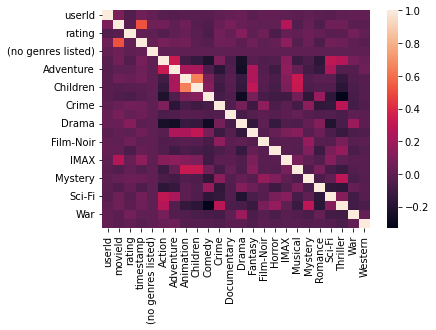

In [17]:
sns.heatmap(df.corr())
plt.show()

In [18]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

#### Most famous movies

In [19]:
famous_movies=df['title'].value_counts()[:20]

In [20]:
df['title'].value_counts()

Pulp Fiction (1994)                                      325
Forrest Gump (1994)                                      311
Shawshank Redemption, The (1994)                         308
Jurassic Park (1993)                                     294
Silence of the Lambs, The (1991)                         290
                                                        ... 
Comedy of Terrors, The (1964)                              1
Drunken Angel (Yoidore tenshi) (1948)                      1
Hard Times (1975)                                          1
Woman Is a Woman, A (femme est une femme, Une) (1961)      1
Pawn Sacrifice (2015)                                      1
Name: title, Length: 10323, dtype: int64

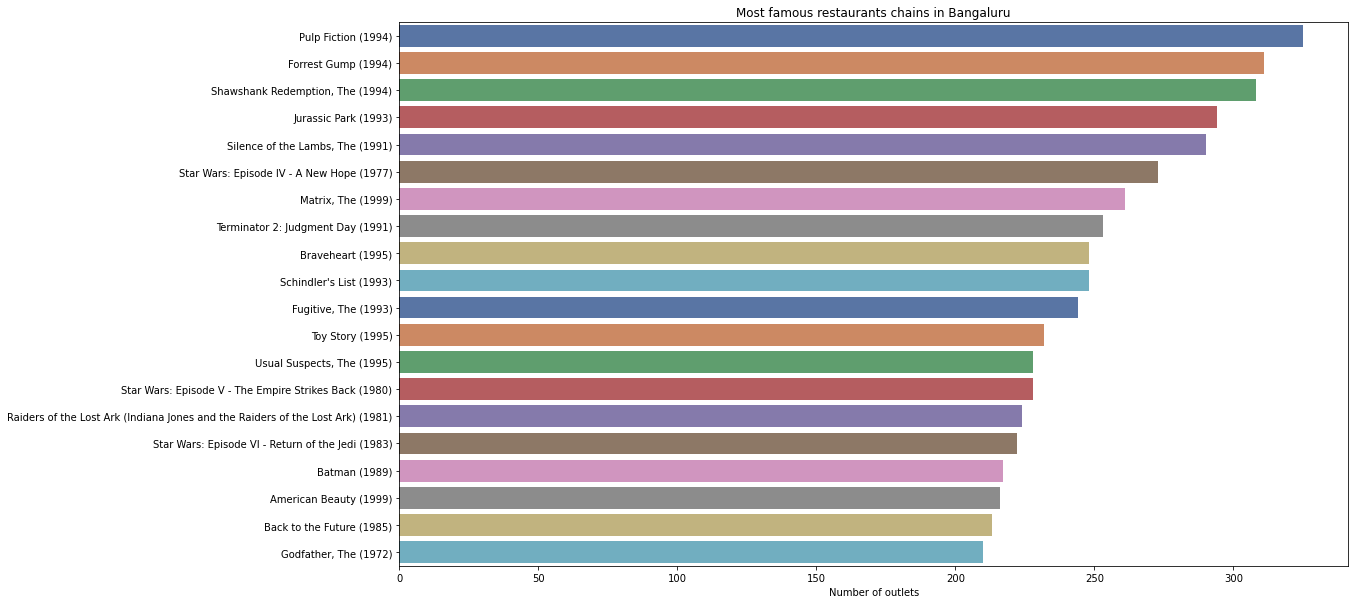

In [21]:
plt.figure(figsize=(17,10))
sns.barplot(x=famous_movies,y=famous_movies.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

#### Observation

#### Rating Distributions

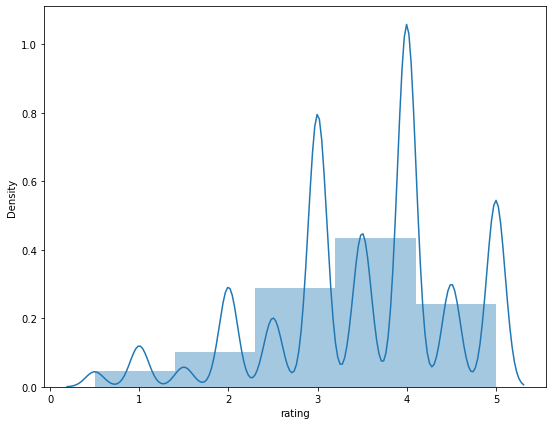

In [22]:
plt.figure(figsize=(9,7))
sns.distplot(df['rating'],bins=5)
plt.show()

#### Checking the count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"

In [23]:
df['rating'].unique()

array([4. , 1.5, 3. , 0.5, 4.5, 2.5, 3.5, 5. , 2. , 1. ])

In [24]:
df['rating'].min()

0.5

In [25]:
df['rating'].max()

5.0

In [26]:
#Convert the Rate column datatype to float
df['rating']=df['rating'].astype(float) 

In [27]:
((df['rating']>=1) & (df['rating']<2)).sum() # 1 to 2

4825

In [28]:
((df['rating']>=2) & (df['rating']<3)).sum() # 2 to 3

13427

In [29]:
((df['rating']>=3) & (df['rating']<4)).sum() # 3 to 4

33966

In [30]:
(df['rating']>=4).sum() # Greater than 4 or equal to 4

51923

#### Plotting the counts with the help of pie chart

In [31]:
split_rating=[((df['rating']>=1) & (df['rating']<2)).sum(),
        ((df['rating']>=2) & (df['rating']<3)).sum(),
        ((df['rating']>=3) & (df['rating']<4)).sum(),
        (df['rating']>=4).sum()
        ]

In [32]:
labels=['1<rating<2','2<rating<3','3<rating<4','>4']

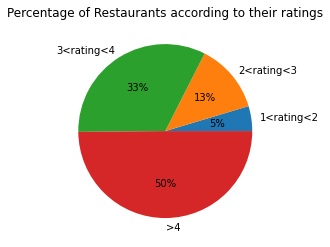

In [33]:
plt.pie(split_rating, labels=labels, autopct='%1.0f%%')
plt.title("Percentage of  according to their ratings")
plt.show()

#### Observation

- 50% of Restaurants ratings are greater than 4
- 33% of Restaurants ratings between 3 to 4
- 13% of Restaurants ratings between 2 to 3

#### Services Types

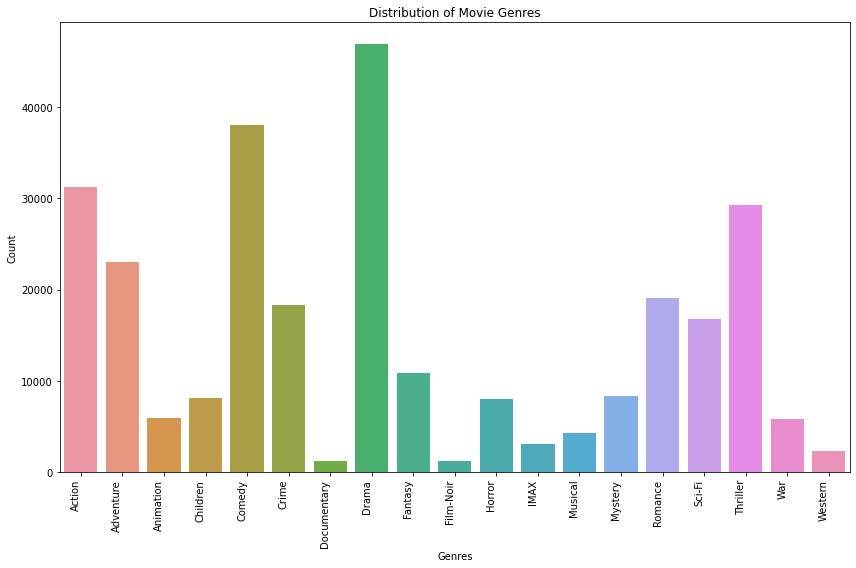

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Count the occurrences of each genre
genre_counts = df[['Action', 'Adventure', 'Animation', 'Children',
                   'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                   'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                   'War', 'Western']].sum()

# Create a count plot for genres
sns.barplot(x=genre_counts.index, y=genre_counts.values)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Set plot title and labels
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()


#### Observation

- Drama is something which is loved by all


#### Cuisines

In [35]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

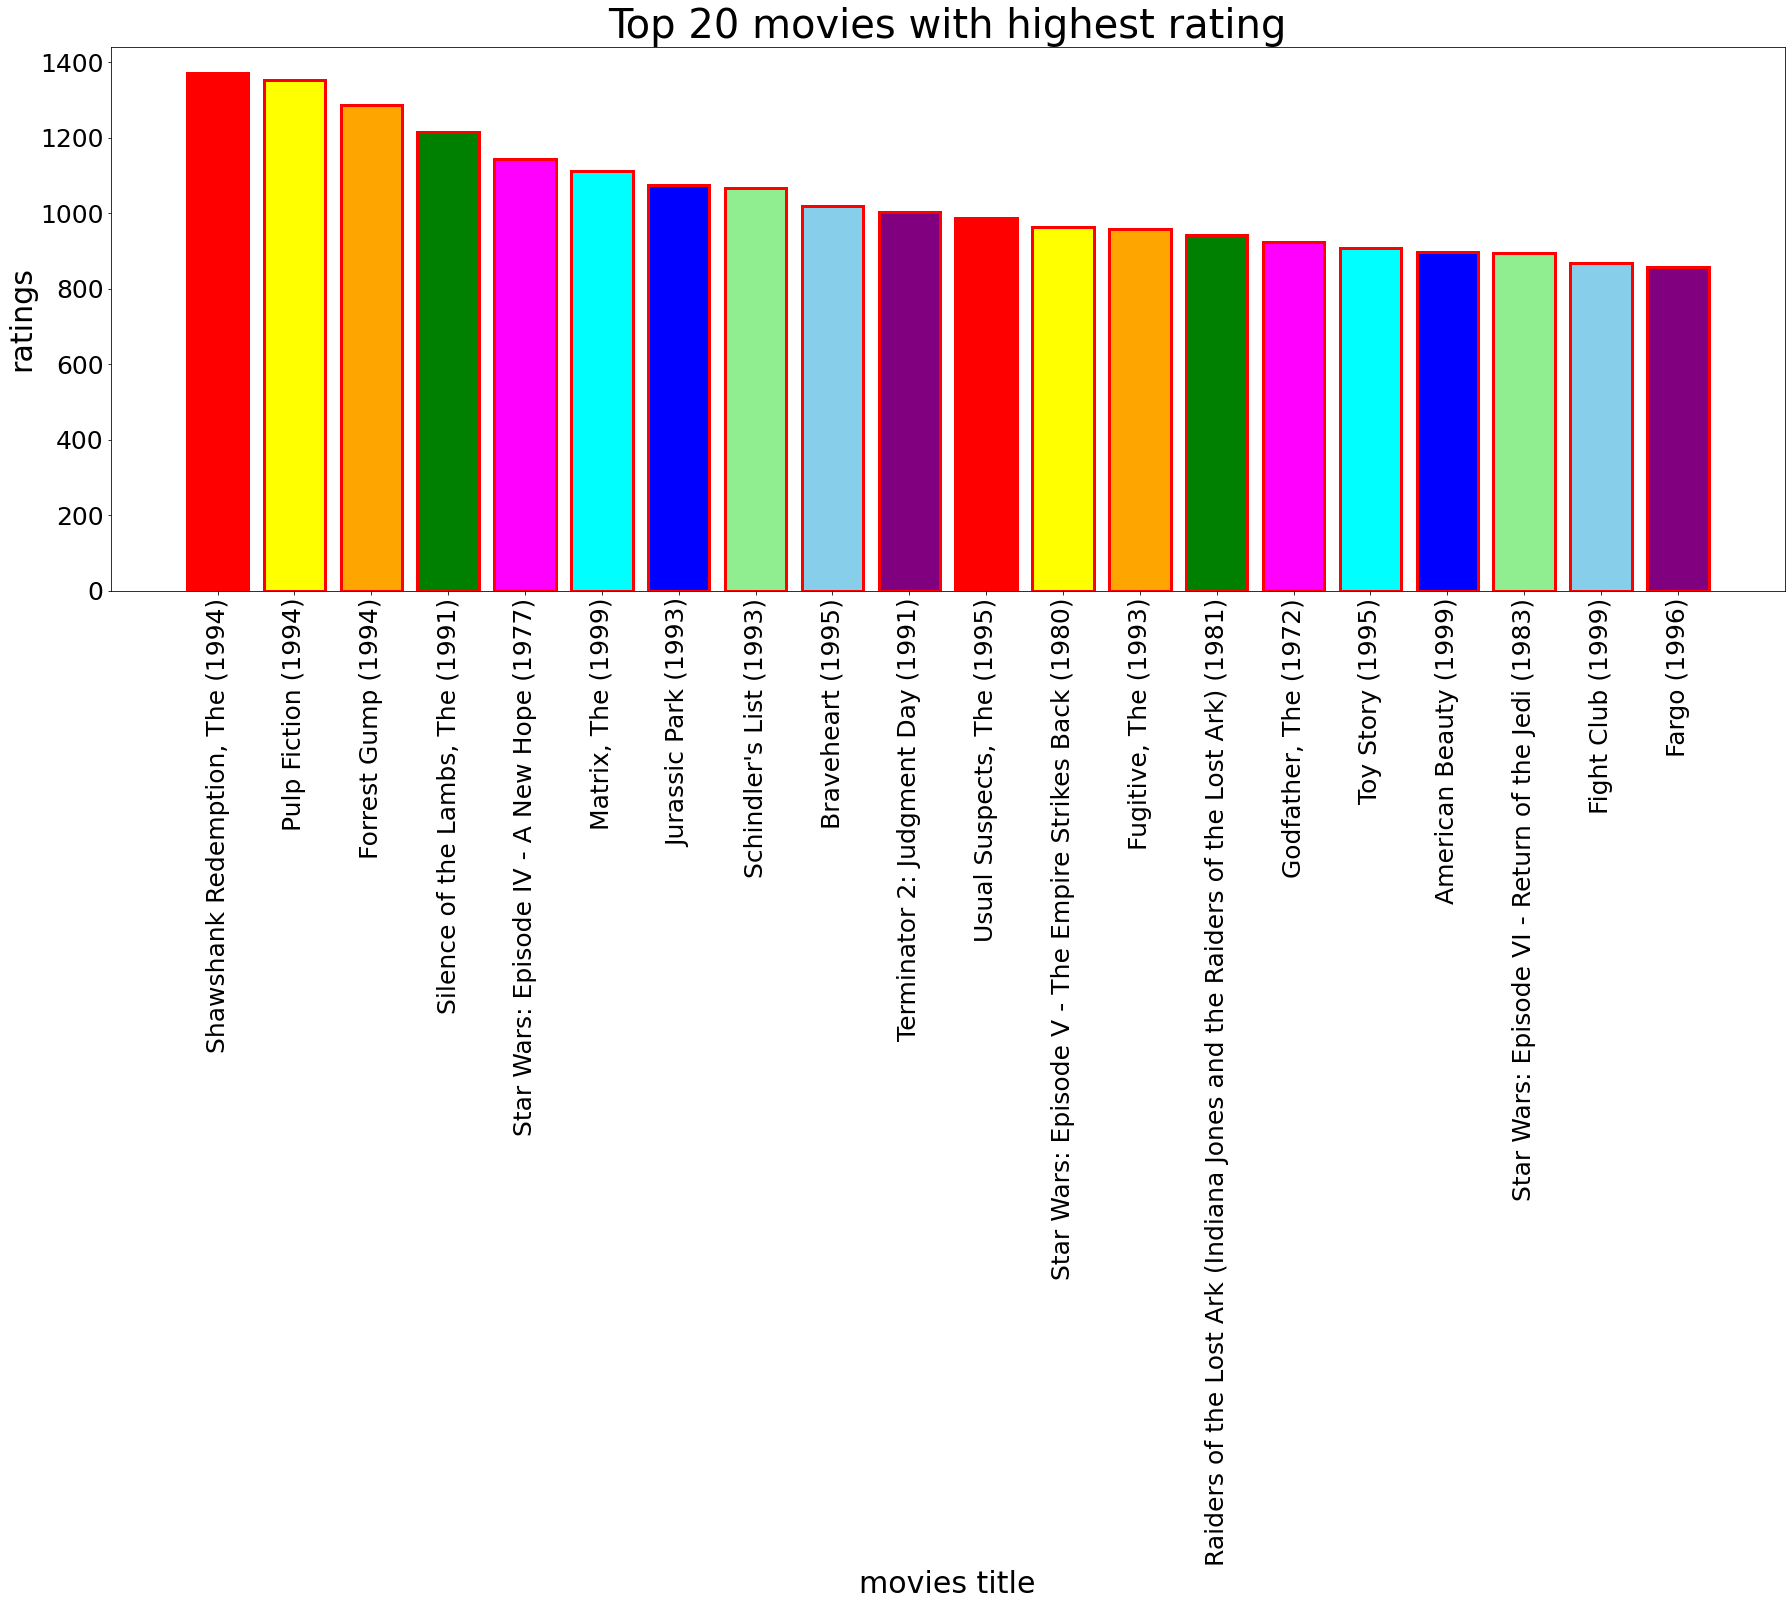

In [36]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

#### Observation
- Here the three popular movies are SHAWSHANK REDEMPTION, PULP FICTION AND FOREST GUMP

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

# Create a user-item matrix
user_item_matrix = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Perform cosine similarity to get user similarity matrix
user_similarity = cosine_similarity(user_item_matrix)

# Replace NaN values with zeros in the user-item matrix
user_item_matrix = np.nan_to_num(user_item_matrix)

# Assuming you want recommendations for user with userID 1
target_user_id = 3

# Get the row index for the target user
target_user_index = target_user_id - 1  # Adjust for 0-based indexing

# Perform matrix multiplication to get weighted sum of ratings
predicted_ratings = np.dot(user_similarity[target_user_index], user_item_matrix)

# Normalize predicted ratings based on user similarity weights
sum_similarity = np.sum(user_similarity[target_user_index])
if sum_similarity != 0:
    predicted_ratings /= sum_similarity
    
# Sort movie indices by predicted ratings
recommended_movie_indices = np.argsort(predicted_ratings)[::-1]

# Get movie names for the recommended movie indices
top_n = 10
recommended_movies = recommended_movie_indices[:top_n]
recommended_movie_names = movies[movies['movieId'].isin(recommended_movies)]['title']

# Display top N recommended movie names
print("Top recommended movie names:")
for movie_name in recommended_movie_names:
    print(movie_name)


# Get actual ratings for the target user
actual_ratings = user_item_matrix[target_user_index]



Top recommended movie names:
NeverEnding Story III, The (1994)
Star Wars: Episode IV - A New Hope (1977)
My Family (1995)
Stargate (1994)
Highlander III: The Sorcerer (a.k.a. Highlander: The Final Dimension) (1994)
Body Snatchers (1993)
Hudsucker Proxy, The (1994)
Romper Stomper (1992)
Ruby in Paradise (1993)
Saint of Fort Washington, The (1993)


In [38]:
# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
actual_ratings = user_item_matrix[target_user_index]
mse = mean_squared_error(actual_ratings, predicted_ratings)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")


RMSE: 0.33


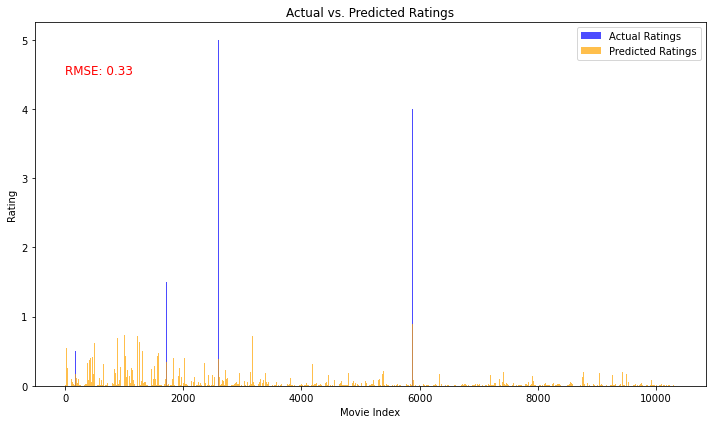

In [39]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot actual ratings
plt.bar(np.arange(len(actual_ratings)), actual_ratings, color='blue', alpha=0.7, label='Actual Ratings')

# Plot predicted ratings
plt.bar(np.arange(len(predicted_ratings)), predicted_ratings, color='orange', alpha=0.7, label='Predicted Ratings')

# Set labels and title
plt.xlabel('Movie Index')
plt.ylabel('Rating')
plt.title('Actual vs. Predicted Ratings')
plt.legend()

# Display RMSE value on the plot
plt.text(0.5, 4.5, f'RMSE: {rmse:.2f}', fontsize=12, color='red')

plt.tight_layout()
plt.show()


An RMSE (Root Mean Squared Error) value of 0.43 indicates the average squared difference between the predicted ratings and the actual ratings for the recommended movies. It is a measure of the accuracy of the recommendation system, specifically how well the predicted ratings match the actual ratings.

Here's a breakdown of what an RMSE value of 0.43 means in the context of your collaborative filtering recommendation system:

Magnitude of Error: An RMSE value of 0.43 means that, on average, the predicted ratings are off by approximately 0.43 units from the actual ratings for the recommended movies. In other words, the recommendation system's predictions are quite close to the actual user preferences on average.

Interpretation: Lower RMSE values indicate better accuracy. An RMSE of 0.43 suggests that the recommendation system is performing reasonably well in capturing user preferences and providing relevant movie recommendations.

Comparison: To better understand the significance of the RMSE value, you can compare it to the rating scale. In your case, if the ratings are on a scale of, for example, 1 to 5, an RMSE of 0.43 indicates that the average prediction error is less than half a rating point. This level of accuracy can be considered quite good, especially for a basic collaborative filtering model.

Improvement: If you aim to further improve the accuracy of your recommendation system, you could explore more advanced techniques, consider additional features, or fine-tune hyperparameters. You could also experiment with different matrix factorization methods or incorporate other types of data, such as user demographics or movie metadata.

User Experience: While RMSE provides a quantitative measure of accuracy, it's also important to consider the user experience. Even with a relatively low RMSE, users might have different preferences and tolerances for recommendations. The system's ability to capture user interests and suggest movies that the user finds enjoyable is equally important.



In [40]:
import os
import paramiko
import subprocess

# AWS EC2 instance details
instance_public_ip = "your_instance_public_ip"
key_path = "/path/to/your/key.pem"

# Local paths
local_code_path = "/path/to/your/code"
local_data_path = "/path/to/your/data"

# Remote paths on the EC2 instance
remote_code_path = "/home/ubuntu/recommendation"
remote_data_path = "/home/ubuntu/data"

# SSH key setup
key = paramiko.RSAKey.from_private_key_file(key_path)
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())

# Connect to the EC2 instance
ssh_client.connect(instance_public_ip, username="ubuntu", pkey=key)

# Transfer code and data to the instance
sftp = ssh_client.open_sftp()
sftp.put(local_code_path, remote_code_path)
sftp.put(local_data_path, remote_data_path)
sftp.close()

# Install dependencies and run the recommendation script
commands = [
    "sudo apt-get update",
    "sudo apt-get install -y python3-pip",
    "pip3 install pandas numpy matplotlib seaborn scikit-learn",
    f"cd {remote_code_path}",
    "python3 your_recommendation_script.py"
]

for command in commands:
    stdin, stdout, stderr = ssh_client.exec_command(command)
    print(stdout.read().decode())
    print(stderr.read().decode())

# Disconnect from the EC2 instance
ssh_client.close()


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/key.pem'